# EJERCICIO TITANIC

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg)

Para el ejercicio final, intentá combinar todas las habilidades que aprendiste hasta ahora para cumplir las consignas. **Sentite libre de desviarte de las consignas y explorar los datos que te parezcan interesantes.**

**Link dataset**: https://raw.githubusercontent.com/riverofacundo/cursos/main/rain.csv

Este archivo contiene información sobre todos los pasajeros y tripulantes del RMS Titanic. Sus columnas son:

- ``name``: strings with the name of the passenger.
- ``gender``: "male" or "female".
- ``age``: a float with the persons age on the day of the sinking. The age of babies (under 12 months) is given as a fraction of one year.
- ``class``: a string specifying the class (1st, 2nd or 3rd) for passengers or the type of service aboard for crew members.
- ``embarked``: the persons place of of embarkment.
- ``country``: the persons home country.
- ``ticketno``: the persons ticket number (NA for crew members).
- ``fare``: the ticket price (NA for crew members, musicians and employees of the shipyard company).
- ``sibsp``: a number specifying the number if siblings/spouses aboard.
- ``parch``: a number specifying the number of parents/children aboard.
- ``survived``: a string ("no" or "yes") specifying whether the person has survived the sinking.

In [92]:
import pandas as pd
import seaborn as sns
import numpy as np

In [93]:
titanic = pd.read_csv('titanic.csv')

Leer el dataset y mostrar:

- Los primeros 5 registros
- Los ultimos 5 registros

In [94]:
pd.set_option('display.max_columns', None)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


¿Cuantas filas y columnas tiene el dataset?


In [96]:
titanic.shape

(891, 12)


Cambiar el nombre de la columna ``age`` por ``edad``

In [97]:
titanic.rename(columns={'Age': 'edad'}, inplace=True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'edad', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Aplicar un ``describe`` y sacar por lo menos 3 conclusiones

In [98]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,edad,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


:¿Cuales son las personas que tienen los tickets con mayores precio?

In [99]:
titanic_sorted = titanic.sort_values('Fare', ascending=False)
print(titanic_sorted.head())

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
737          738         1       1              Lesurer, Mr. Gustave J   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
88            89         1       1          Fortune, Miss. Mabel Helen   
27            28         0       1      Fortune, Mr. Charles Alexander   

        Sex  edad  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
88   female  23.0      3      2     19950  263.0000  C23 C25 C27        S  
27     male  19.0      3      2     19950  263.0000  C23 C25 C27        S  


Contar la cantidad de personas por genero

In [100]:
titanic['Gender'] = titanic['Sex'].apply(lambda x: x[0].upper())
gender_counts = titanic['Gender'].value_counts()
print(gender_counts)

Gender
M    577
F    314
Name: count, dtype: int64


¿De cuantos paises diferentes provenian las personas?

In [101]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Encontrar la edad promedio de todas las personas a bordo

In [102]:
titanic['edad'].mean()

29.69911764705882

Filtrar solo los hombres, de primera clase, que sean de Estados unidos o Inglaterra. Finalmente ordenarlos por el precio del ticket

In [103]:
titanic[(titanic['Gender'] == 'M') & (titanic['Pclass'] == 1) & (titanic['Embarked'].isin(['Q', 'S']))].sort_values('Fare', ascending= False).head()

,PassengerId,Survived,Pclass,Name,Sex,edad,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,M
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S,M
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,M
332,333,0,1,"Graham, Mr. George Edward",male,38.00,0,1,PC 17582,153.4625,C91,S,M
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,M


Contar cuantas personas murieron o sobrevivieron que no sean ni de Estados unidos ni de Inglaterra



In [104]:
titanic[~titanic['Embarked'].isin(['U', 'S'])].groupby('Survived').size()

Survived
0    122
1    125
dtype: int64

Encontrar la edad promedio de los hombres a bordo


In [105]:
titanic[titanic['Gender'] == 'M']['edad'].mean()

30.72664459161148

Seleccionar solo las personas que pertenezca a la clase '3rd', luego contar cuantos sobrevivieron y cuantos murieron.

In [106]:
third_class_passengers = titanic[titanic['Pclass'] == 3]
number_survived = third_class_passengers[third_class_passengers['Survived'] == 1].shape[0]
number_fatalities = third_class_passengers[third_class_passengers['Survived'] == 0].shape[0]
print(f"En la clase 3, {number_survived} personas sobrevivieron y {number_fatalities} murieron.")

En la clase 3, 119 personas sobrevivieron y 372 murieron.


Tarifa promedio correspondiente a cada tipo de clase

In [107]:
grouped_df = titanic.groupby('Pclass')
average_fare_per_class = grouped_titanic['Fare'].mean()
print(average_fare_per_class)

Cabin
A10    40.125000
A14    52.000000
A16    39.600000
A19    26.000000
A20    56.929200
         ...    
F33    11.333333
F38     7.750000
F4     39.000000
G6     13.581250
T      35.500000
Name: Fare, Length: 147, dtype: float64


Encuentre la tasa de supervivencia promedio correspondiente a cada tipo de cabina

In [108]:
grouped_titanic = titanic.groupby('Cabin')
survival_rates = (grouped_titanic['Survived'].mean() * 100).round(1)
print(survival_rates)

Cabin
A10      0.0
A14      0.0
A16    100.0
A19      0.0
A20    100.0
       ...  
F33    100.0
F38      0.0
F4     100.0
G6      50.0
T        0.0
Name: Survived, Length: 147, dtype: float64


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

Hacer graficos y sacar conclusiones, algunos ejemplos:

- Relacion entre la clase en la que se viaja y la edad de la persona
- Supervivencia por edad

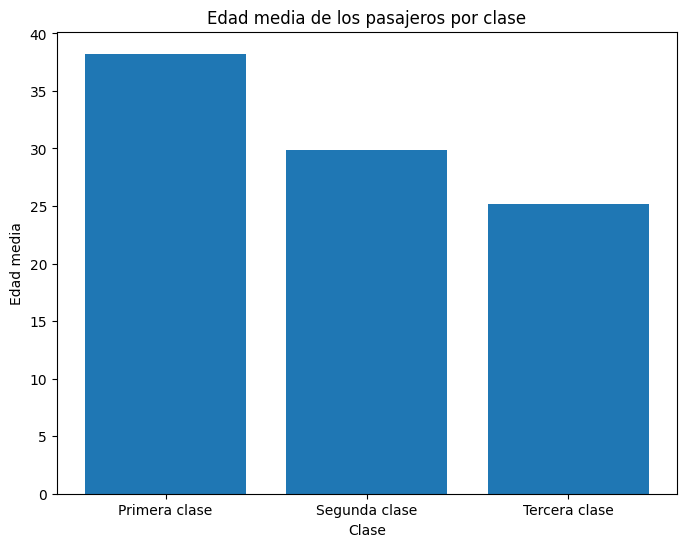

In [110]:
age_by_class = titanic.groupby('Pclass')['edad'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(age_by_class['Pclass'], age_by_class['edad'])
plt.xlabel('Clase')
plt.ylabel('Edad media')
plt.title('Edad media de los pasajeros por clase')
plt.xticks(age_by_class['Pclass'], ['Primera clase', 'Segunda clase', 'Tercera clase'])
plt.show()

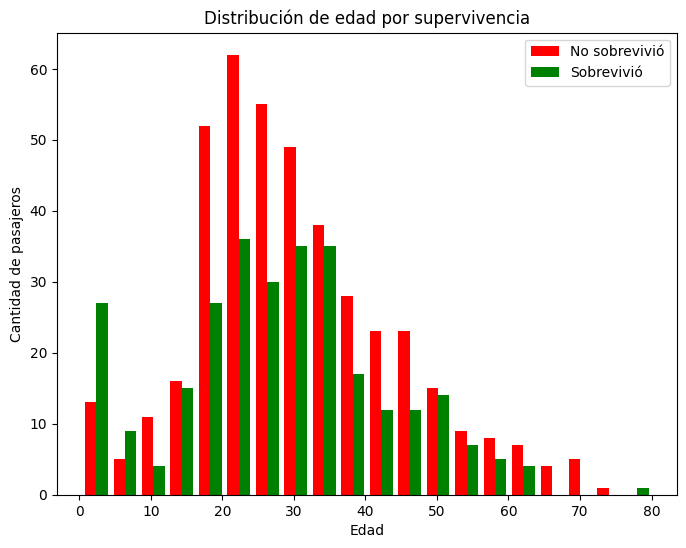

In [111]:
plt.figure(figsize=(8, 6))
plt.hist([titanic[titanic['Survived'] == 0]['edad'], titanic[titanic['Survived'] == 1]['edad']], bins=20, color=['r', 'g'], label=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Edad')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de edad por supervivencia')
plt.legend()
plt.show()

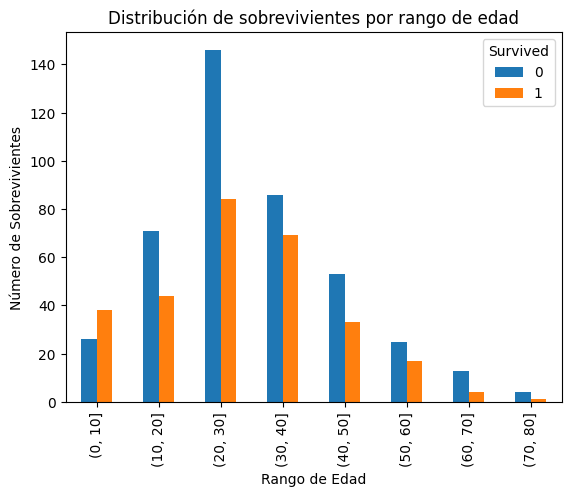

In [112]:
rangos = [0, 10, 20, 30, 40, 50, 60, 70, 80]

sobrevivientes = titanic.groupby(pd.cut(titanic['edad'], bins=rangos ))['Survived'].value_counts().sort_index().unstack()

sobrevivientes.plot(kind='bar')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Sobrevivientes')
plt.title("Distribución de sobrevivientes por rango de edad")
plt.show()